In [ ]:
import numpy as np
from scipy.stats import ttest_rel
import pandas as pd

In [ ]:
mohler = pd.read_csv("mohlersimilarities.csv")
sprag = pd.read_csv("spragsimilarities.csv")
stsb = pd.read_csv("stsbsimilarities.csv")

In [ ]:
def cohen_d(group1, group2):
    """
    Calculate Cohen's d as a measure of effect size.

    Parameters:
    - group1: array-like, the first group of similarity scores
    - group2: array-like, the second group of similarity scores

    Returns:
    - Cohen's d value
    """
    mean_diff = np.mean(group1) - np.mean(group2)
    pooled_std = np.sqrt((np.std(group1)**2 + np.std(group2)**2) / 2)

    return mean_diff / pooled_std

In [ ]:
sprag.head()

,Unnamed: 0,sentence1,sentence2,similarity_score,Jaccard_score,TFIDF_cosine_score,NegWMD_score,USE_cosine_score,SBERT CrossEncoder_score,SBERT BiEncoder_cosine_score,SimCSE Supervised_cosine_score,SimCSE Unsupervised_cosine_score
0,3082,Univariate plots visualize only one variable a...,Univariate discuss about one variable\nBivaria...,3.5,0.400000,0.454704,-0.618221,0.330228,0.565232,0.734347,0.761878,0.681221
1,1514,The min() function returns the item with the l...,min() is used to find the minimum value of the...,3.0,0.153846,0.221108,-0.714341,0.527603,0.458228,0.709376,0.756680,0.702755
2,3488,Accuracy is an evalution metric for classficat...,It's about how exactly the model works,3.0,0.058824,0.102921,-0.882452,0.249073,0.404429,0.414231,0.617002,0.353833
3,4061,train_test_split() is a method of sklearn mode...,train_test_split() is a method of sklearn mode...,5.0,1.000000,1.000000,-0.000000,1.000000,0.996584,1.000000,1.000000,1.000000
4,3410,Classification is a supervised learning approa...,It is the possible types the data can be segre...,1.0,0.066667,0.041631,-0.973615,0.251110,0.305661,0.373492,0.578761,0.340358


In [ ]:
# Replace infinite updated data with nan
sprag.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
sprag.dropna(inplace=True)
# Replace infinite updated data with nan
mohler.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
mohler.dropna(inplace=True)
# Replace infinite updated data with nan
stsb.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
stsb.dropna(inplace=True)

In [ ]:
len(mohler), len(stsb), len(sprag)

(741, 1362, 1253)

In [ ]:
stsb= stsb[:741]
sprag = sprag[:741]

In [ ]:
len(mohler), len(stsb), len(sprag)

(741, 741, 741)

In [ ]:
import seaborn as sns
sns.set_theme()
sns.set(rc={"figure.dpi":600, 'savefig.dpi':600})
sns.set_style("white")

In [ ]:
mohler.columns

Index(['Unnamed: 0', 'sentence1', 'sentence2', 'similarity_score',
       'Jaccard_score', 'TFIDF_cosine_score', 'NegWMD_score',
       'USE_cosine_score', 'SBERT CrossEncoder_score',
       'SBERT BiEncoder_cosine_score', 'SimCSE Supervised_cosine_score',
       'SimCSE Unsupervised_cosine_score'],
      dtype='object')

In [ ]:
index = ['Jaccard', 'TFIDF', 'NegWMD', 'USE', 'SBERT CE', 'SBERT BiE', 'SimCSE Supervised', 'SimCSE Unsupervised']
columns = ['(STSB, Mohler)', '(STSB, SPRAG)', '(Mohler, SPRAG)']
data = []

In [ ]:
#jaccard p values
data.append([ttest_rel(sprag['Jaccard_score'], stsb['Jaccard_score']).pvalue,
ttest_rel(mohler['Jaccard_score'], stsb['Jaccard_score']).pvalue,
ttest_rel(sprag['Jaccard_score'], mohler['Jaccard_score']).pvalue])
#adding tf_idf p values
data.append([ttest_rel(sprag['TFIDF_cosine_score'], stsb['TFIDF_cosine_score']).pvalue,
ttest_rel(mohler['TFIDF_cosine_score'], stsb['TFIDF_cosine_score']).pvalue,
ttest_rel(sprag['TFIDF_cosine_score'], mohler['TFIDF_cosine_score']).pvalue])

#adding NegWMD_score
data.append([ttest_rel(sprag['NegWMD_score'], stsb['NegWMD_score']).pvalue,
ttest_rel(mohler['NegWMD_score'], stsb['NegWMD_score']).pvalue,
ttest_rel(sprag['NegWMD_score'], mohler['NegWMD_score']).pvalue])

#adding Universal sentence encoder
data.append([ttest_rel(sprag['USE_cosine_score'], stsb['USE_cosine_score']).pvalue,
ttest_rel(mohler['USE_cosine_score'], stsb['USE_cosine_score']).pvalue,
ttest_rel(sprag['USE_cosine_score'], mohler['USE_cosine_score']).pvalue])


In [ ]:
data.append([ttest_rel(sprag['SBERT CrossEncoder_score'], stsb['SBERT CrossEncoder_score']).pvalue,
ttest_rel(mohler['SBERT CrossEncoder_score'], stsb['SBERT CrossEncoder_score']).pvalue,
ttest_rel(sprag['SBERT CrossEncoder_score'], mohler['SBERT CrossEncoder_score']).pvalue])

data.append([ttest_rel(sprag['SBERT BiEncoder_cosine_score'], stsb['SBERT BiEncoder_cosine_score']).pvalue,
ttest_rel(mohler['SBERT BiEncoder_cosine_score'], stsb['SBERT BiEncoder_cosine_score']).pvalue,
ttest_rel(sprag['SBERT BiEncoder_cosine_score'], mohler['SBERT BiEncoder_cosine_score']).pvalue])



data.append([ttest_rel(sprag['SimCSE Supervised_cosine_score'], stsb['SimCSE Supervised_cosine_score']).pvalue,
ttest_rel(mohler['SimCSE Supervised_cosine_score'], stsb['SimCSE Supervised_cosine_score']).pvalue,
ttest_rel(sprag['SimCSE Supervised_cosine_score'], mohler['SimCSE Supervised_cosine_score']).pvalue])

data.append([ttest_rel(sprag['SimCSE Unsupervised_cosine_score'], stsb['SimCSE Unsupervised_cosine_score']).pvalue,
ttest_rel(mohler['SimCSE Unsupervised_cosine_score'], stsb['SimCSE Unsupervised_cosine_score']).pvalue,
ttest_rel(sprag['SimCSE Unsupervised_cosine_score'], mohler['SimCSE Unsupervised_cosine_score']).pvalue])

In [ ]:
data

[[2.649756148886027e-19, 5.572579527707976e-22, 0.44105798650896855],
 [0.0001317873049754647, 2.7512957854325048e-15, 1.0194250467907254e-05],
 [8.786413595154362e-21, 1.1494654142202443e-22, 0.6898935607310963],
 [4.1190543525843764e-09, 1.4247479307661416e-10, 0.8149936541550521],
 [9.632079568761488e-13, 0.0028848747529146733, 5.348588296666228e-08],
 [1.7252292436597199e-16, 0.0012996849726596394, 4.3069748348291605e-11],
 [1.2566018494534597e-14, 0.0008699914701129404, 1.4027261203370722e-08],
 [0.3204989104328059, 9.555220107007626e-05, 5.221154936325402e-08]]

In [ ]:
# Create the DataFrame
df = pd.DataFrame(data, index=index, columns=columns)
df

,"(STSB, Mohler)","(STSB, SPRAG)","(Mohler, SPRAG)"
Jaccard,2.649756e-19,5.572580e-22,4.410580e-01
TFIDF,1.317873e-04,2.751296e-15,1.019425e-05
NegWMD,8.786414e-21,1.149465e-22,6.898936e-01
USE,4.119054e-09,1.424748e-10,8.149937e-01
SBERT CE,9.632080e-13,2.884875e-03,5.348588e-08
SBERT BiE,1.725229e-16,1.299685e-03,4.306975e-11
SimCSE Supervised,1.256602e-14,8.699915e-04,1.402726e-08
SimCSE Unsupervised,3.204989e-01,9.555220e-05,5.221155e-08


<Axes: >

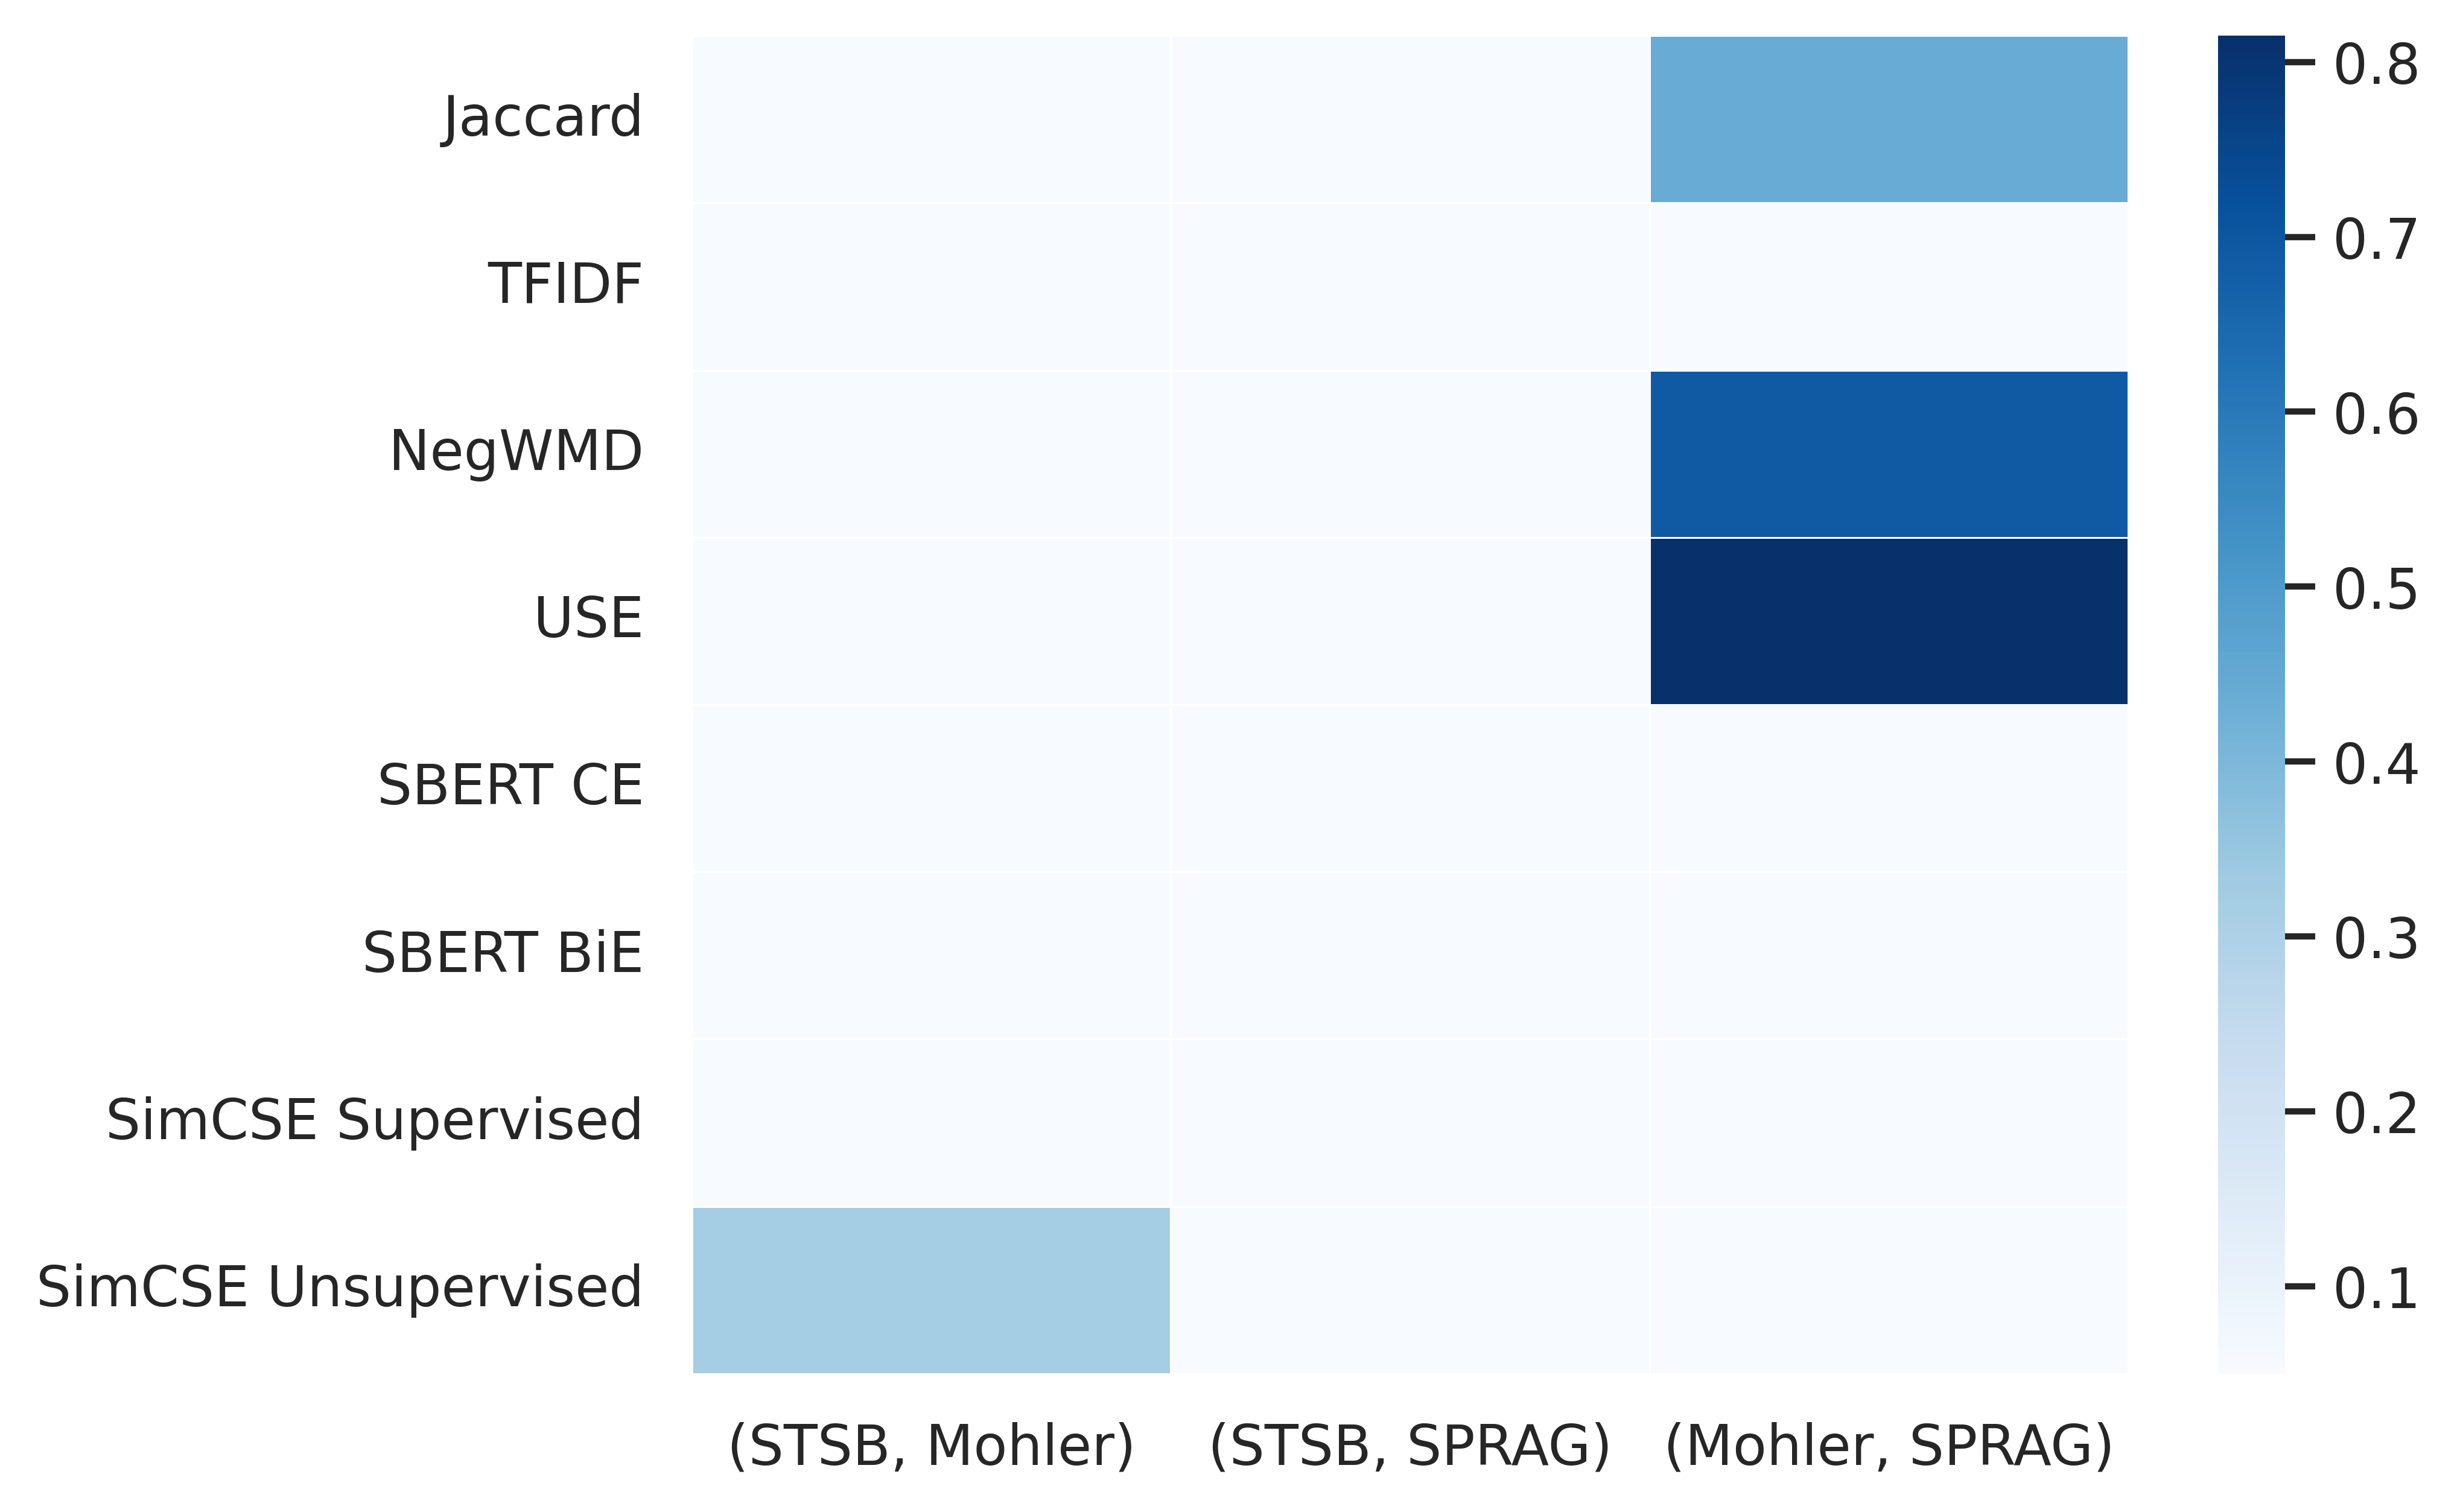

In [ ]:
import seaborn as sns
sns.heatmap(df, vmin=0.05,
   cmap='Blues', linewidth=0.3)

In [ ]:
index = ['Jaccard', 'TFIDF', 'NegWMD', 'USE', 'SBERT CE', 'SBERT BiE', 'SimCSE Supervised', 'SimCSE Unsupervised']
columns = ['(STSB, Mohler)', '(STSB, SPRAG)', '(Mohler, SPRAG)']
data = []

In [ ]:
#jaccard
data.append([cohen_d(sprag['Jaccard_score'], stsb['Jaccard_score']),
cohen_d(mohler['Jaccard_score'], stsb['Jaccard_score']),
cohen_d(sprag['Jaccard_score'], mohler['Jaccard_score'])])
#tf_idf p
data.append([cohen_d(sprag['TFIDF_cosine_score'], stsb['TFIDF_cosine_score']),
cohen_d(mohler['TFIDF_cosine_score'], stsb['TFIDF_cosine_score']),
cohen_d(sprag['TFIDF_cosine_score'], mohler['TFIDF_cosine_score'])])

#adding NegWMD_score
data.append([cohen_d(sprag['NegWMD_score'], stsb['NegWMD_score']),
cohen_d(mohler['NegWMD_score'], stsb['NegWMD_score']),
cohen_d(sprag['NegWMD_score'], mohler['NegWMD_score'])])

#adding Universal sentence encoder
data.append([cohen_d(sprag['USE_cosine_score'], stsb['USE_cosine_score']),
cohen_d(mohler['USE_cosine_score'], stsb['USE_cosine_score']),
cohen_d(sprag['USE_cosine_score'], mohler['USE_cosine_score'])])


In [ ]:
data.append([cohen_d(sprag['SBERT CrossEncoder_score'], stsb['SBERT CrossEncoder_score']),
cohen_d(mohler['SBERT CrossEncoder_score'], stsb['SBERT CrossEncoder_score']),
cohen_d(sprag['SBERT CrossEncoder_score'], mohler['SBERT CrossEncoder_score'])])

data.append([cohen_d(sprag['SBERT BiEncoder_cosine_score'], stsb['SBERT BiEncoder_cosine_score']),
cohen_d(mohler['SBERT BiEncoder_cosine_score'], stsb['SBERT BiEncoder_cosine_score']),
cohen_d(sprag['SBERT BiEncoder_cosine_score'], mohler['SBERT BiEncoder_cosine_score'])])



data.append([cohen_d(sprag['SimCSE Supervised_cosine_score'], stsb['SimCSE Supervised_cosine_score']),
cohen_d(mohler['SimCSE Supervised_cosine_score'], stsb['SimCSE Supervised_cosine_score']),
cohen_d(sprag['SimCSE Supervised_cosine_score'], mohler['SimCSE Supervised_cosine_score'])])

data.append([cohen_d(sprag['SimCSE Unsupervised_cosine_score'], stsb['SimCSE Unsupervised_cosine_score']),
cohen_d(mohler['SimCSE Unsupervised_cosine_score'], stsb['SimCSE Unsupervised_cosine_score']),
cohen_d(sprag['SimCSE Unsupervised_cosine_score'], mohler['SimCSE Unsupervised_cosine_score'])])

In [ ]:
data

[[-0.48274697219657126, -0.505967390854119, 0.039770331547052166],
 [-0.20050225465689994, -0.41374426489979993, 0.22816956233410707],
 [-0.5054588604454987, -0.5154823869830294, 0.020580647264296842],
 [-0.3113316835996594, -0.33333068845987374, 0.012036856137927158],
 [0.37409408776868336, 0.15480151282853355, 0.28305283214705534],
 [0.4362340228131192, 0.1700449911090109, 0.3409157851467219],
 [0.407258759340667, 0.17467333150445208, 0.295282883153886],
 [0.0518292767302931, -0.2036353423961931, 0.28304537708544625]]

In [ ]:
# Create the DataFrame
df = pd.DataFrame(data, index=index, columns=columns)
df

,"(STSB, Mohler)","(STSB, SPRAG)","(Mohler, SPRAG)"
Jaccard,-0.482747,-0.505967,0.039770
TFIDF,-0.200502,-0.413744,0.228170
NegWMD,-0.505459,-0.515482,0.020581
USE,-0.311332,-0.333331,0.012037
SBERT CE,0.374094,0.154802,0.283053
SBERT BiE,0.436234,0.170045,0.340916
SimCSE Supervised,0.407259,0.174673,0.295283
SimCSE Unsupervised,0.051829,-0.203635,0.283045


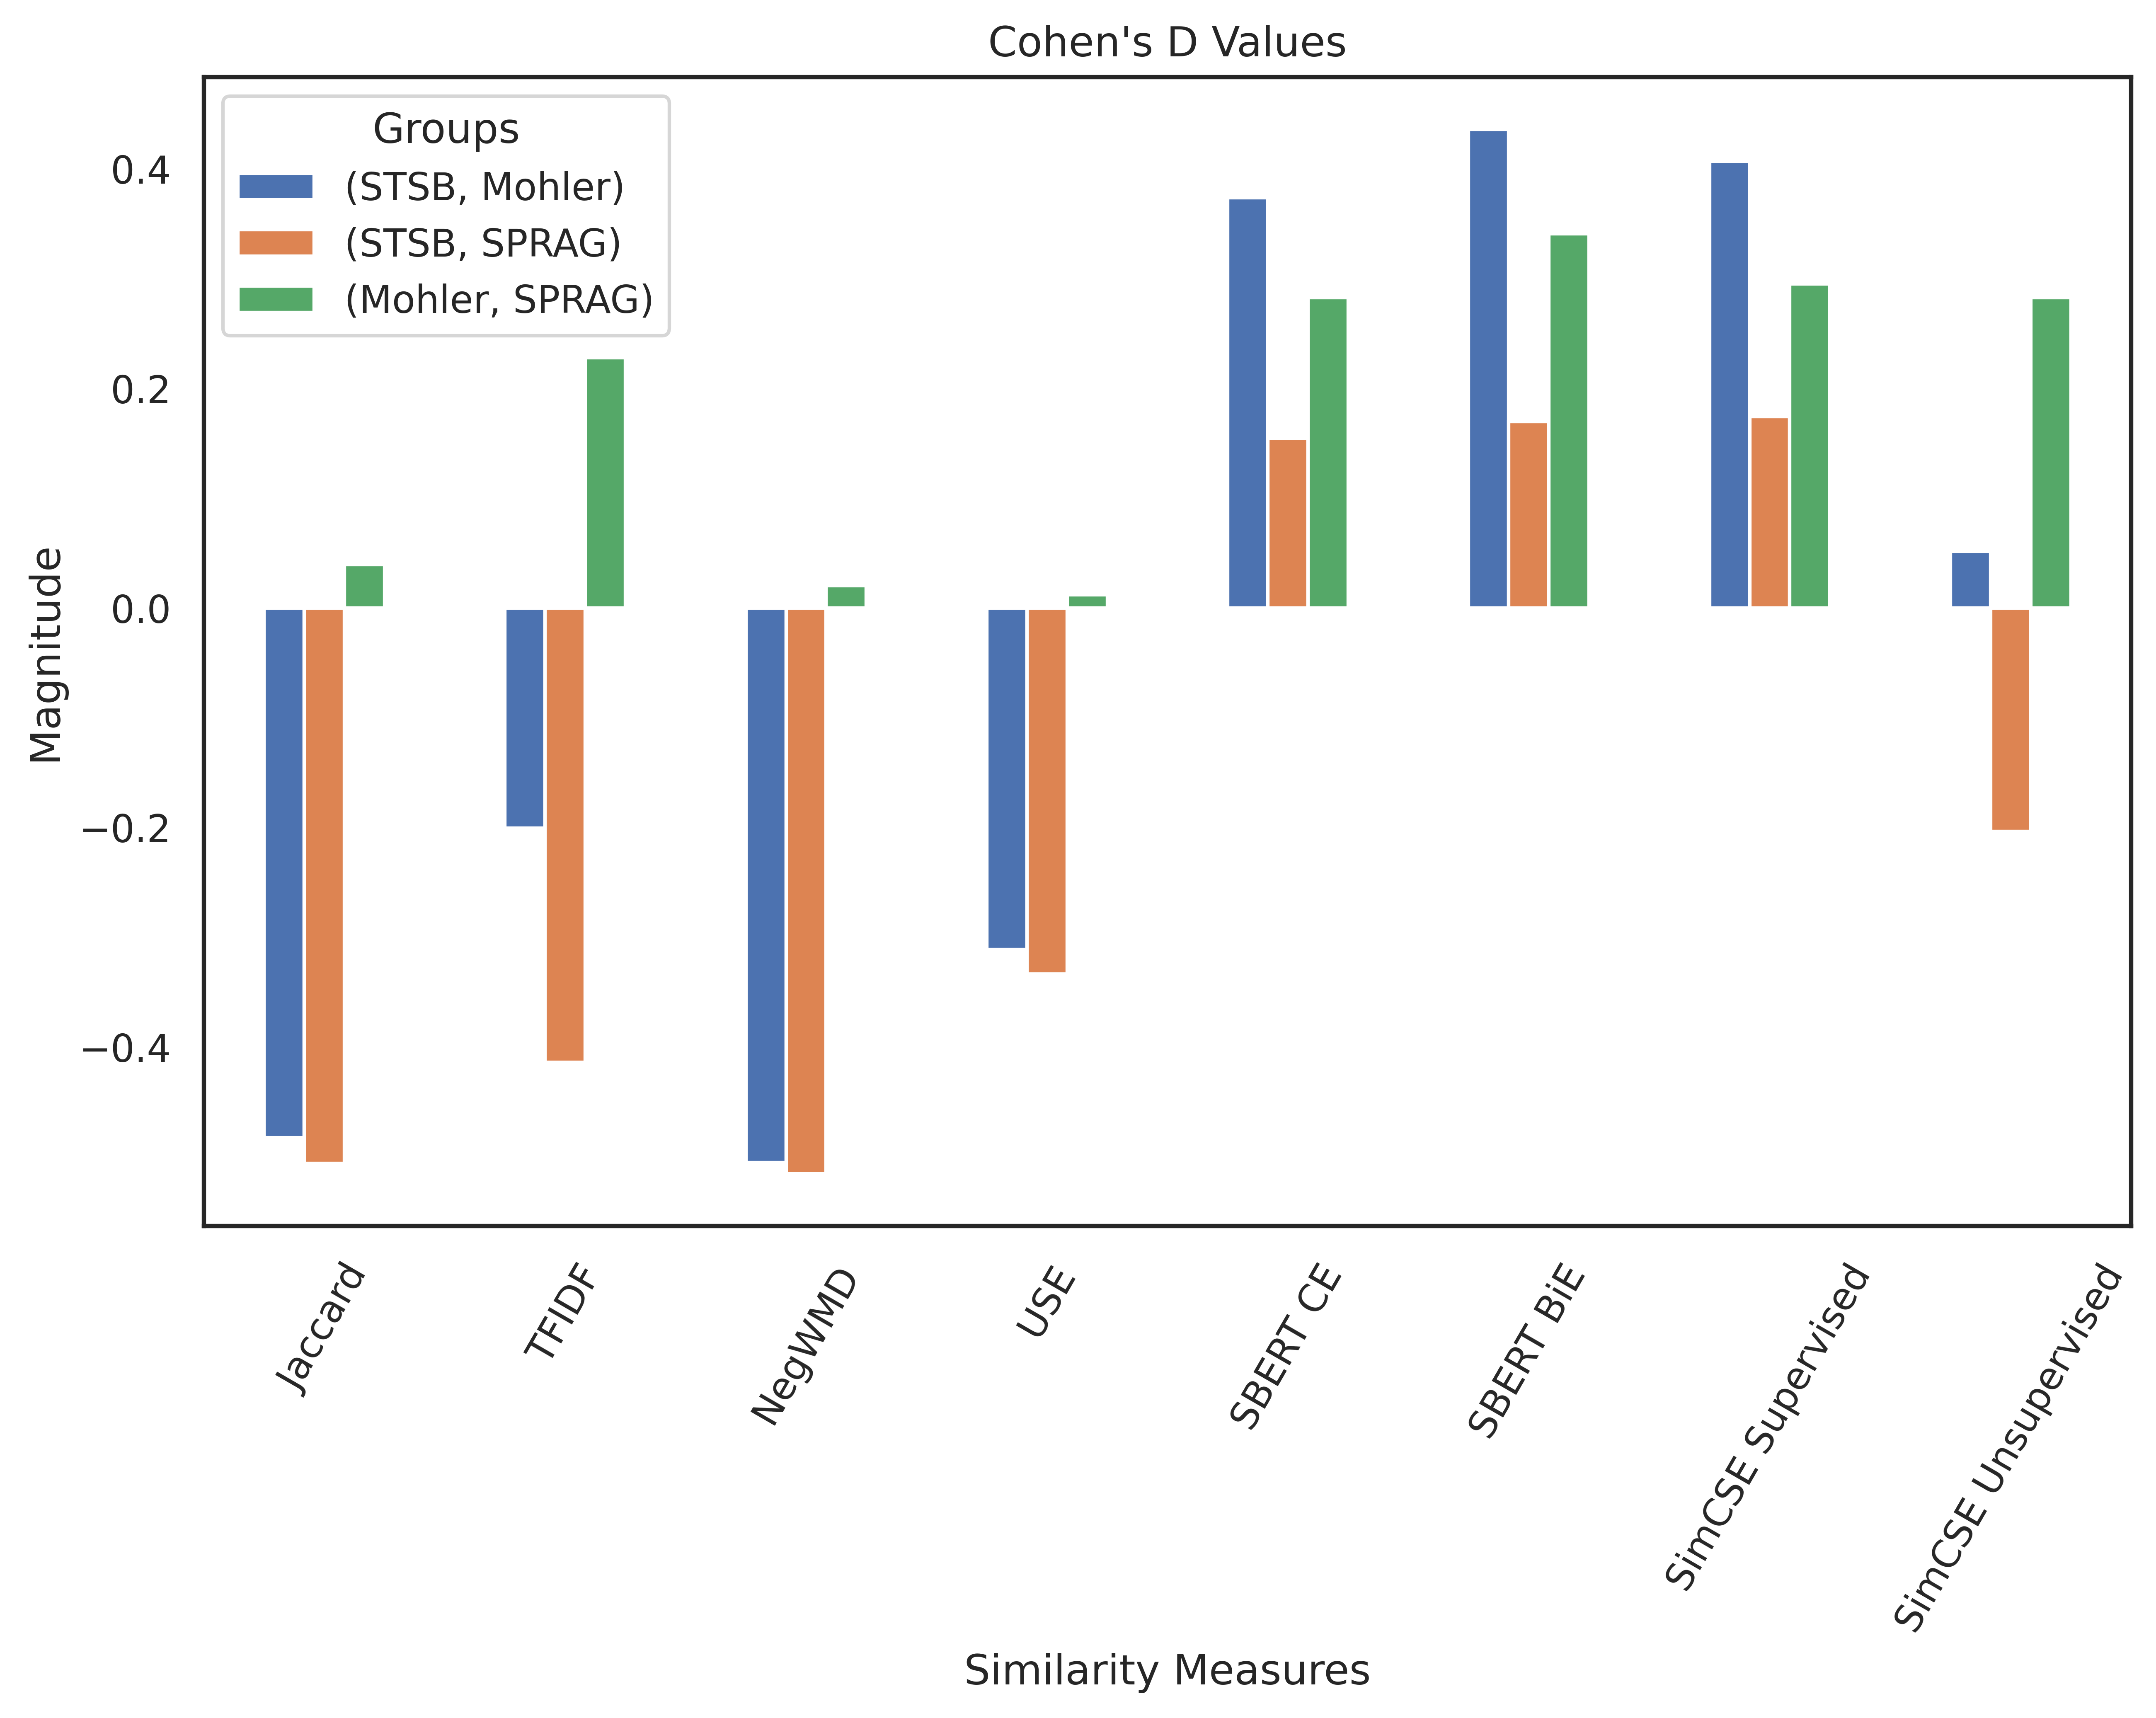

In [ ]:
import matplotlib.pyplot as plt
# Plot the multi-bar chart
ax = df.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.xlabel('Similarity Measures')
plt.ylabel('Magnitude')
plt.title("Cohen's D Values")
plt.legend(title='Groups')
plt.xticks(rotation=60)  # Rotate x-axis labels if needed

# Display the plot
plt.show()